## Simulation of Random Variables


    pip install git+https://github.com/chriskward/random-variables

The ContinuousRV and DiscreteRV classes allow us to specify a random variable in terms of a density/mass function and support. We can then carry out probabilistic calculations and generate samples from its distribution. This package uses a range of numerical methods to approximate probability functions and to carry out the required integrations. For a discussion of these methods, see my other work on [curve approximation](https://github.com/chriskward/numerical-methods/blob/main/rectdemo.ipynb).

<br>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from simulation import ContinuousRV, DiscreteRV

<br>

The class constructor does not require a normalised density function; the normalisation constant will be calculated and applied when the random variable object is created. We only require a numpy vectorised function that is non-negative over its domain. Lets create a standard normal random variable using the normal density core.

<br>


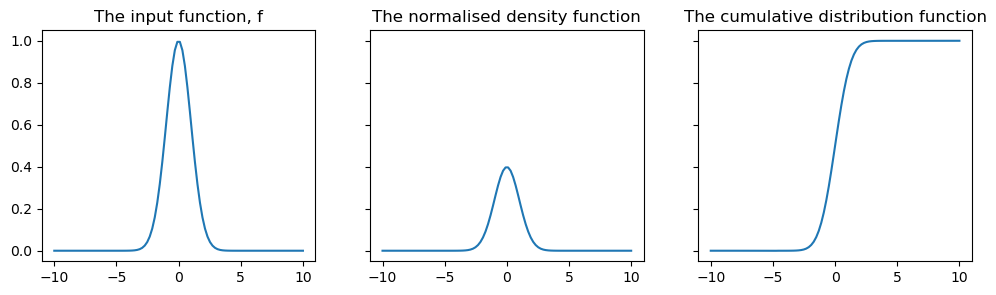

In [12]:
# the density core (un-normalised) of the standard normal distribution
f = lambda x: np.exp((-1/2)*x**2)

x = np.linspace(-10,10,100)
y = f(x)

# create X, an instance of Continuous RV
X = ContinuousRV(f, a=-10,b=10, epsilon=0.0001)

fig,ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12,3))
ax[0].plot(x,y)
ax[0].set_title('The input function, f')
ax[1].plot(x,[X.D(z) for z in x])
ax[1].set_title('The normalised density function')
ax[2].plot(x,[X.F(z) for z in x])
ax[2].set_title('The cumulative distribution function');

<br>

We can calculate probabilities using the F and P methods, e.g.

X.F( x ) $ = \mathbb{P}(X<x) $

X.P( a , b ) $ = \mathbb{P}(a < X < b) $

<br>

In [5]:
print(f'P(X < 0.5)    = {X.F(0):.3g}' )
print(f'P(-2 < x < 2) = {X.P(-2,2):.3g}' )

P(X < 0.5)    = 0.5
P(-2 < x < 2) = 0.954


<br>

These values are [correct](https://en.wikipedia.org/wiki/Standard_normal_table#Cumulative_from_minus_infinity_to_Z) to 3 decimal places. For greater accurancy, the epsilon parameter can be adjusted when instantiating the ContinuousRV class.

As we don't need to use normalised probability density function, we can create a random variable with any function that is non negative over its domain. Lets create a random variable $Y$ such that:

$$ P_y(x) = C \sin(x)+1 \quad\quad \text{for}\ x\in(0,2\pi) $$

where $C$ is the normalisation constant to be determined.

<br>

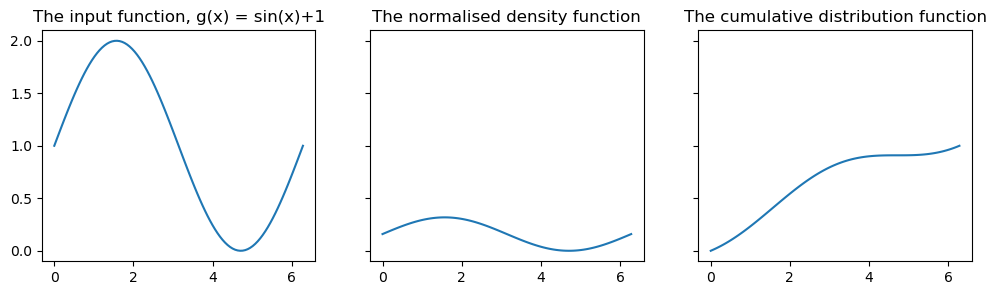

In [6]:
g = lambda x: np.sin(x)+1
x = np.linspace(0,2*np.pi,100)
y = g(x)
Y = ContinuousRV(g,0,2*np.pi)

fig,ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12,3))
ax[0].plot(x,y)
ax[0].set_title('The input function, g(x) = sin(x)+1')
ax[1].plot(x,[Y.D(z) for z in x])
ax[1].set_title('The normalised density function')
ax[2].plot(x,[Y.F(z) for z in x])
ax[2].set_title('The cumulative distribution function');

In [13]:
Y.F(2*np.pi) , Y.P(0,2*np.pi)

(1.0, 1.0)

<br>

Once we have created a random variable, we can generate samples. These are computed via the inversion method  using a numerical approximation of the inverse cumulative distribution function.

<br>

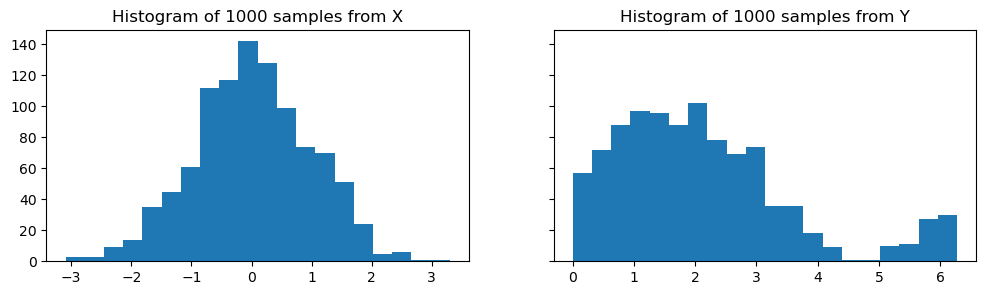

In [15]:
sample_X = X.sample(1000)
sample_Y = Y.sample(1000)

fig,ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,3))
ax[0].hist(sample_X, bins=20)
ax[0].set_title('Histogram of 1000 samples from X')
ax[1].hist(sample_Y, bins=20)
ax[1].set_title('Histogram of 1000 samples from Y');

<br>

The key feature of **ContinuousRV** are the numerical integration methods that allow us to carry out all of the above calculations and sampling. Matters are, ofcourse much simpler for discrete valued random variables. However, for completeness, this package also includes a **DiscreteRV** class, used below to simulate:

<br>
$$ Z \sim \text{Poisson}(5) $$

<br>

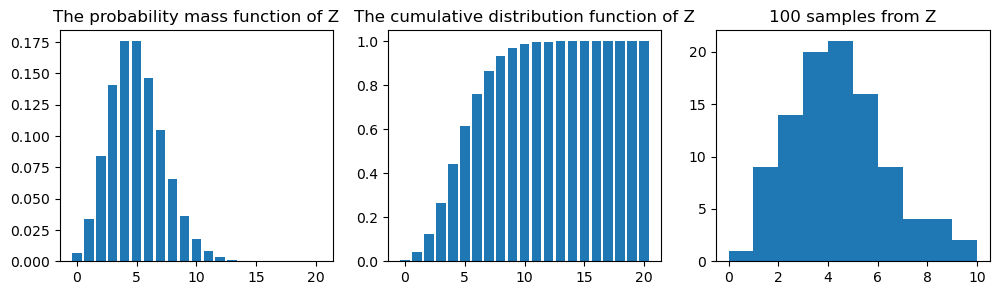

In [11]:
from scipy.special import factorial as F
theta = 5
h = lambda x: (theta**x) * np.exp(-theta) / F(x)

x = np.arange(0,21)
y = h(x)
Z = DiscreteRV(h, range(0,21))

fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
ax[0].bar(x, height=[Z.D(z) for z in x])
ax[0].set_title('The probability mass function of Z')
ax[1].bar(x, height=[Z.F(z) for z in x])
ax[1].set_title('The cumulative distribution function of Z')
ax[2].hist(Z.sample(100))
ax[2].set_title('100 samples from Z');